## Mall Customer Segmentation using K-Means Cluster

Importing Neccesory Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import Image
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

In [4]:
df = pd.read_csv('Mall_Customers.csv')
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploring data

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
mask = df['Spending Score (1-100)']>50
df_score = df[mask]
df_score.head(6)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
3,4,Female,23,16,77
5,6,Female,22,17,76
7,8,Female,23,18,94
9,10,Female,30,19,72
11,12,Female,35,19,99


In [8]:
df_score.describe()                  

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,97.000000,97.000000,97.000000,97.000000
mean,100.298969,34.597938,60.412371,71.670103
std,59.122783,13.024544,26.756133,14.710910
min,2.000000,18.000000,15.000000,51.000000
25%,51.000000,26.000000,42.000000,57.000000
50%,96.000000,31.000000,60.000000,73.000000
75%,152.000000,38.000000,78.000000,85.000000
max,200.000000,70.000000,137.000000,99.000000


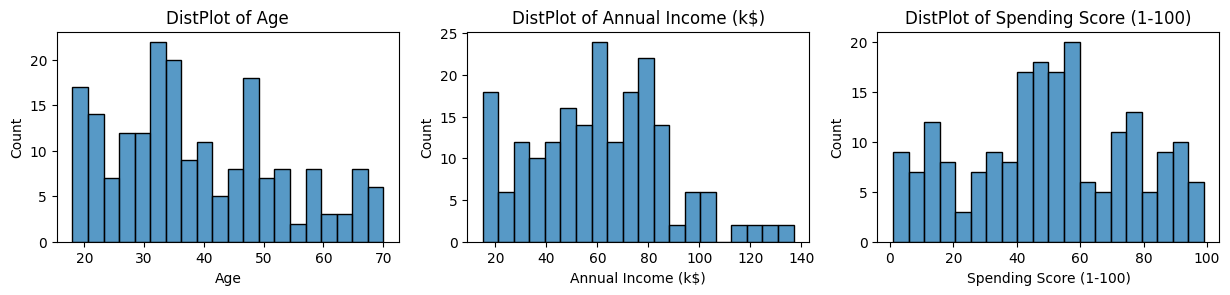

In [9]:
plt.figure(figsize = (15,6))
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n += 1
    plt.subplot(2,3,n)
    plt.subplots_adjust(hspace=0.2,wspace = 0.2)
    sns.histplot(df[x],bins = 20)
    plt.title('DistPlot of {}'.format(x))
plt.show();

These are almost normaly distributed with somw skewness in first and second

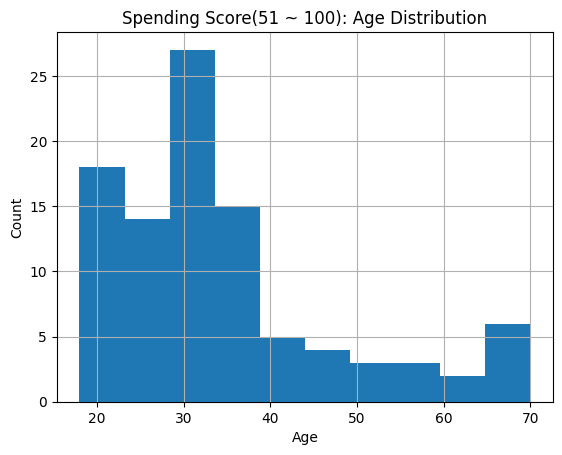

In [10]:
df_score['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Spending Score(51 ~ 100): Age Distribution');

Which means youth spends more on shoping than elders. Especialy who's  age less than 40

## Count Plot of Gender

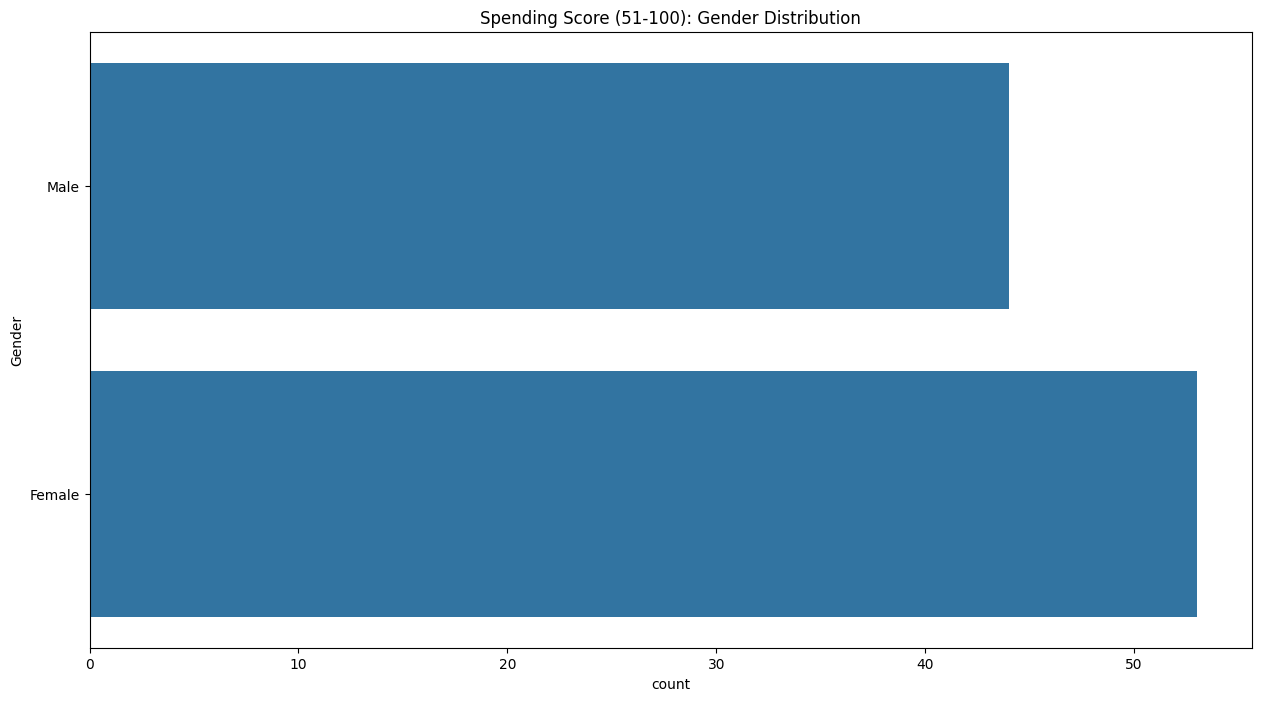

In [13]:
plt.figure(figsize = (15,8))
sns.countplot(y='Gender',data = df_score)
plt.title('Spending Score (51-100): Gender Distribution')
plt.show();

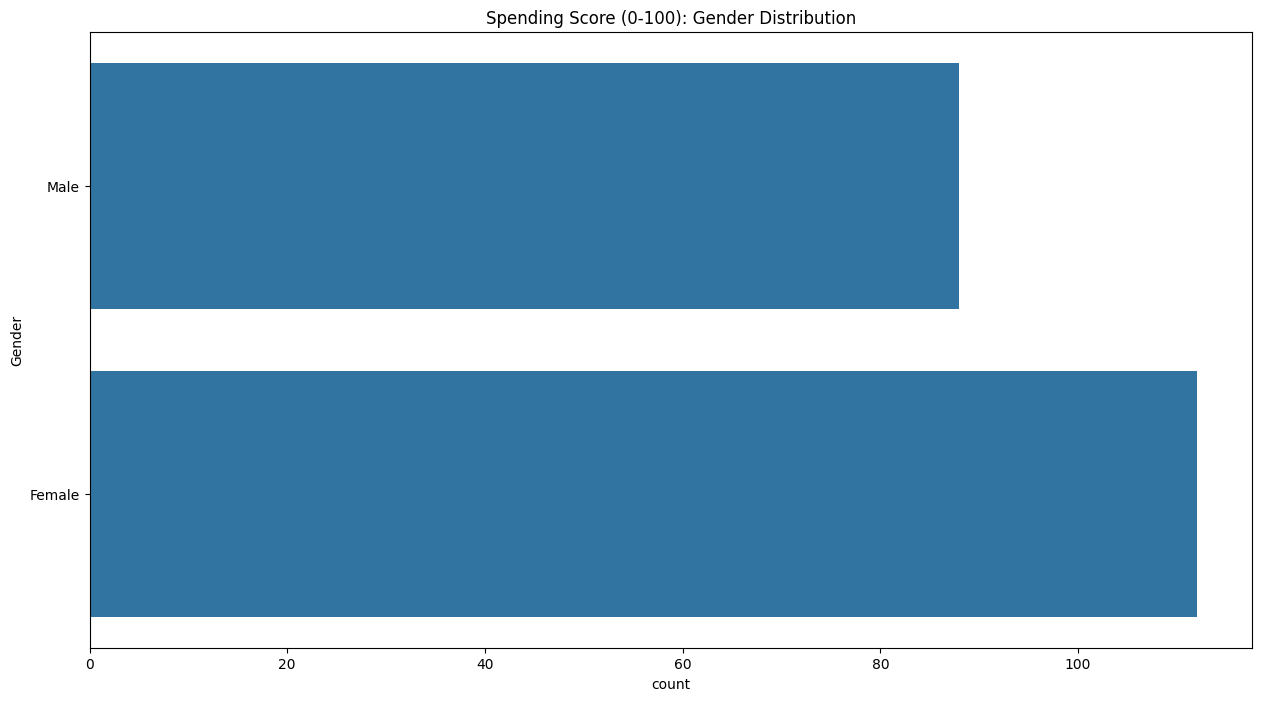

In [15]:
plt.figure(figsize = (15,8))
sns.countplot(y='Gender',data = df)
plt.title('Spending Score (0-100): Gender Distribution')
plt.show();

## Plotting the Relation between Age,Annual Income and Spending Score

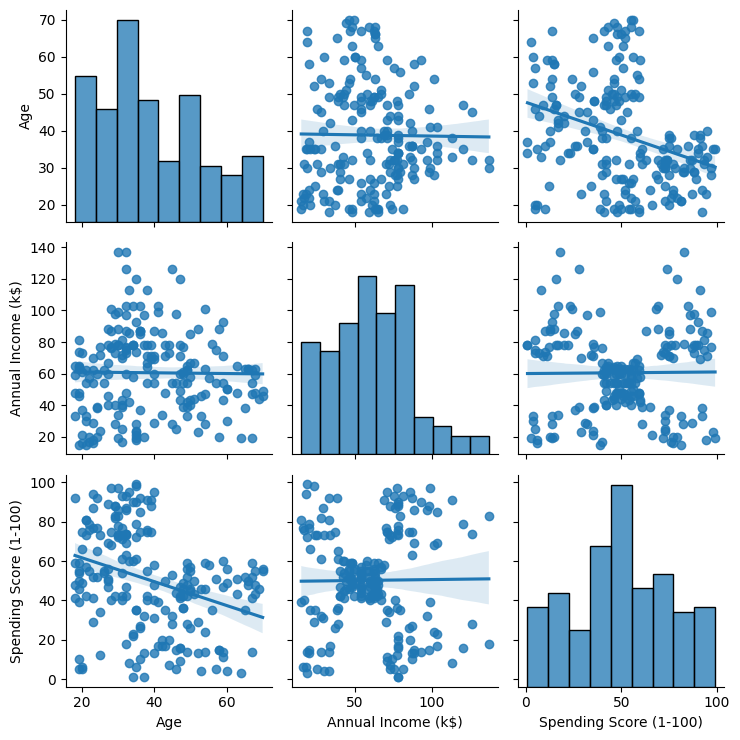

In [16]:
import warnings
warnings.filterwarnings("ignore",category =UserWarning)
sns.pairplot(df[['Age','Annual Income (k$)','Spending Score (1-100)']],kind='reg')
plt.tight_layout()
plt.show();

## Distribution of values in Age , Annual Income and Spending Score according to Gender

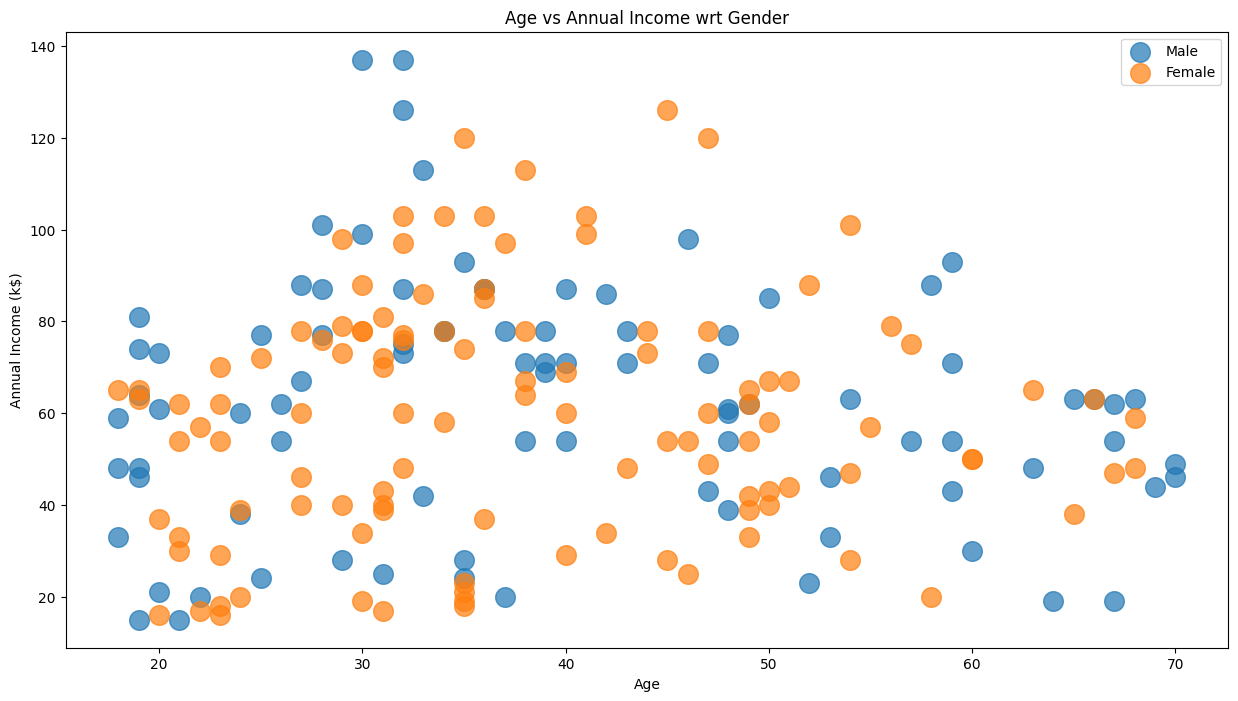

In [21]:
plt.figure(1,figsize = (15,8))
for gender in ['Male','Female']:
    plt.scatter(x = 'Age',y = 'Annual Income (k$)',data =df[df['Gender'] == gender],s = 200,alpha = 0.7,label = gender)
plt.xlabel('Age'),plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income wrt Gender')
plt.legend()
plt.show()

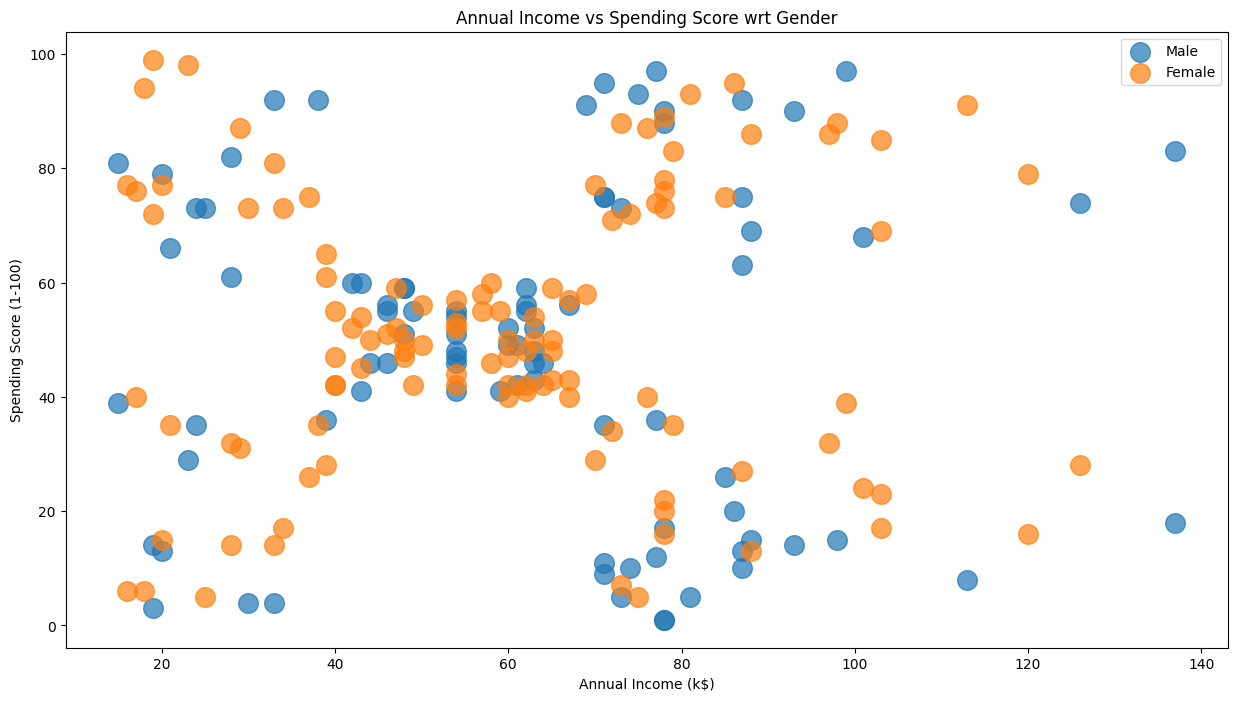

In [23]:
plt.figure(1,figsize = (15,8))
for gender in ['Male','Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',data =df[df['Gender'] == gender],s = 200,alpha = 0.7,label = gender)
plt.xlabel('Annual Income (k$)'),plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score wrt Gender')
plt.legend()
plt.show()

C:\Users\CHRISTIN\AppData\Local\Temp\ipykernel_13152\1434254144.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cols, y='Gender', data=df, palette='vlag')
C:\Users\CHRISTIN\AppData\Local\Temp\ipykernel_13152\1434254144.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cols, y='Gender', data=df, palette='vlag')
C:\Users\CHRISTIN\AppData\Local\Temp\ipykernel_13152\1434254144.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cols, y='Gender', data=df, palette='vlag')


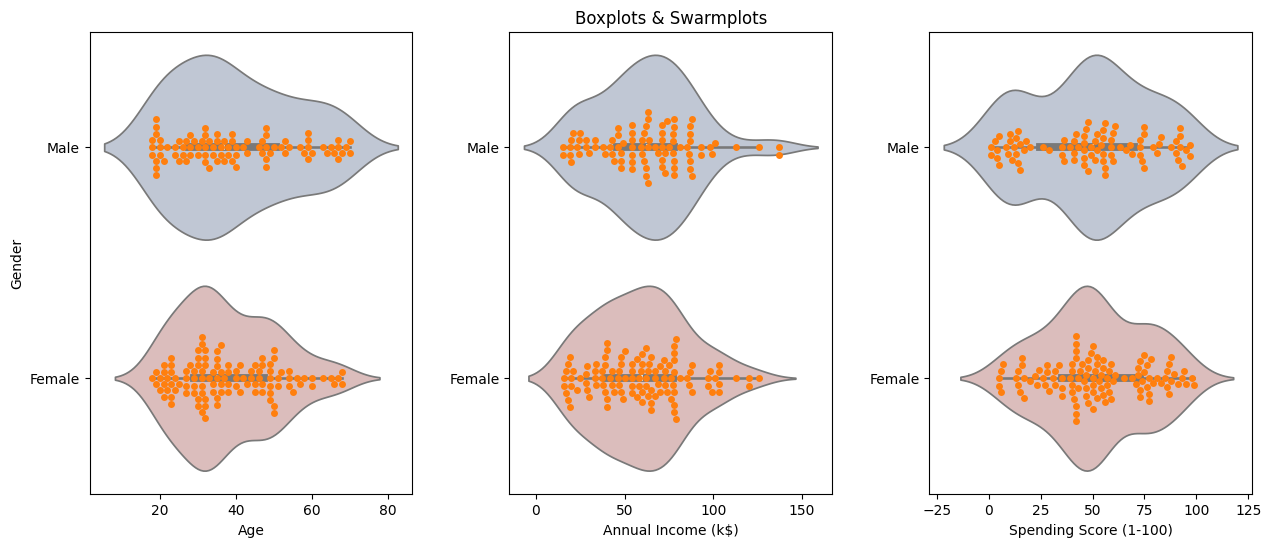

In [27]:

plt.figure(figsize=(15, 6)) 
# Create the figure with the desired size

n = 0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    sns.violinplot(x=cols, y='Gender', data=df, palette='vlag')
    sns.swarmplot(x=cols, y='Gender', data=df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')

plt.show()
